In [1]:
%load_ext autoreload
%autoreload 2

In [7]:
import matplotlib.pyplot as plt
import modJoint as mj
import numpy as np
import pandas as pd
import seaborn as sns

# EXP 1, how does SB model improve performance depending on stimulus sequence

In [87]:
# SB model compare
S = pd.DataFrame()
gam_use, kap_use = 0.8,3.0
for kap_use in np.arange(1.4,4.4,.4):
    for s_trans in [0,1]:
        for u_trans in [0,1]:
            for iteration in range(30):
                this_M = mj.modJoint(gammaCB=gam_use,kappaCB= kap_use,stim_trans=s_trans,uniform_trans=u_trans)
                this_M.run_model(500)
                S_ = pd.Series({'StimTrans':s_trans,'ModelSB':u_trans==0,'KappaCB':kap_use,'GammaCB':gam_use,
                                'E':np.std(this_M.E),'Model':this_M})
                S = S.append(S_,ignore_index=1)
            
S['KappaCB'] = np.round(S['KappaCB'],1)
            

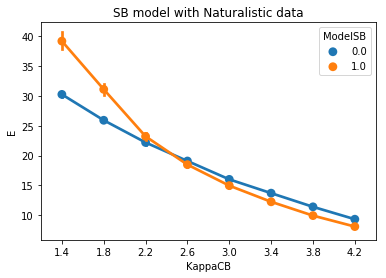

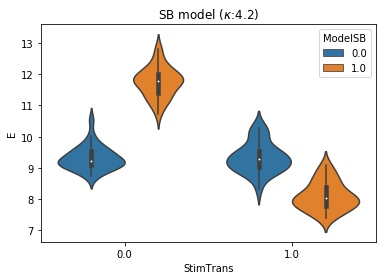

In [102]:
sns.pointplot(data=S[S.StimTrans==1],x='KappaCB',y='E',hue='ModelSB')
plt.title('SB model with Naturalistic data')
plt.show()
sns.violinplot(data=S[S.KappaCB==4.2],x='StimTrans',y='E',hue='ModelSB')
# sns.swarmplot(data=S[S.KappaCB==4.2],x='StimTrans',y='E',hue='ModelSB',dodge=1)
plt.title('SB model ($\kappa$:4.2)')
plt.show()
# plt.ylim([7,13])

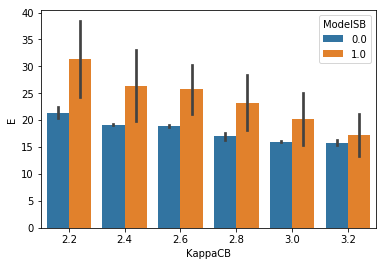

In [60]:
sns.barplot(data=S,x='KappaCB',y='E',hue='ModelSB')

In [105]:
# CB model compare
C = pd.DataFrame()
gam_use, kap_use = 0.8,3.0
for kap_use in np.arange(1.4,4.4,.4):
    for s_prior in [0,1]:
        for u_tuning in [0,1]:
            for iteration in range(30):
                this_M = mj.modJoint(gammaCB=gam_use,kappaCB= kap_use,stim_prior=s_prior,uniform_tuning=u_tuning)
                this_M.run_model(500)
                S_ = pd.Series({'stimPrior':s_prior,'ModelCB':u_tuning==0,'KappaCB':kap_use,'GammaCB':gam_use,
                                'E':np.std(this_M.E),'Model':this_M})
                C = C.append(S_,ignore_index=1)
            
C['KappaCB'] = np.round(S['KappaCB'],1)
            

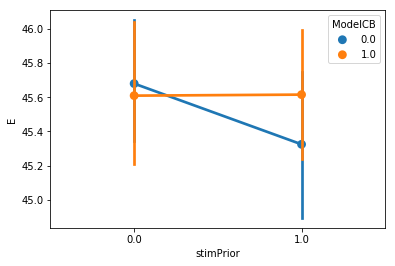

In [113]:
# sns.pointplot(data=C,x='KappaCB',y='E',hue='ModelCB')
sns.pointplot(data=C[C.KappaCB==1.8],x='stimPrior',y='E',hue='ModelCB')

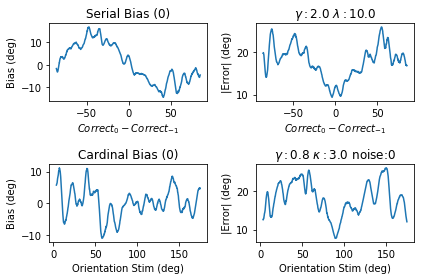

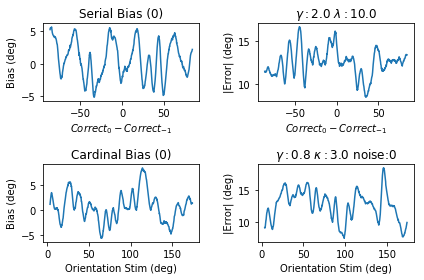

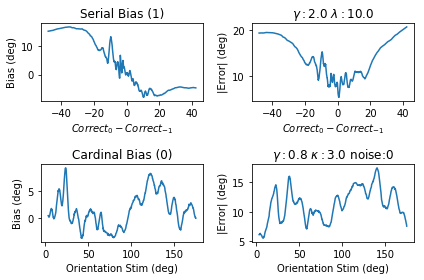

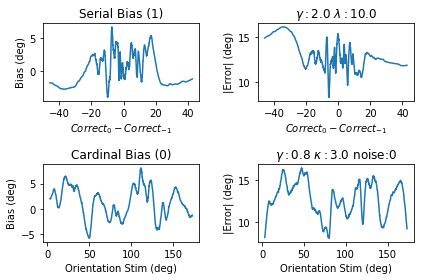

In [49]:
for i in range(4):
    foo = S.loc[i,:].Model
#     plt.hist(foo.E,60,alpha=.4)
#     plt.hist(foo.d,60,alpha=.5)
#     plt.hist(foo.stimHat,60,alpha=.5)
    foo.quick_view_results(50)
# plt.show()

In [12]:
S_['model'] = this_M
S_

StimTrans                                                 1
ModelUTrans                                               1
KappaCB                                                   3
E                                                   16.0922
model          <modJoint.modJoint object at 0x7f35be6392b0>
dtype: object

43.0807714707339
Throwing away 30344 trials with zero [0] spikes


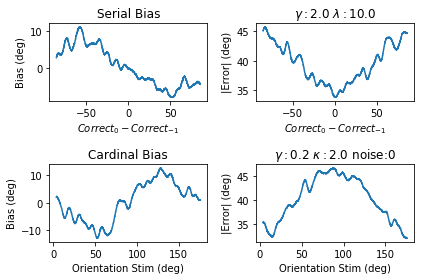

41.44197612336555
Throwing away 27964 trials with zero [0] spikes


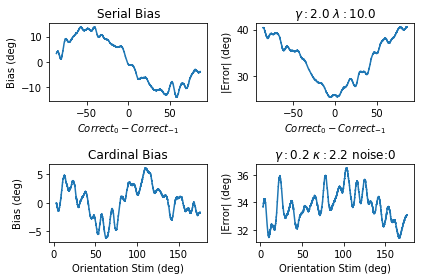

39.801812315395885
Throwing away 25622 trials with zero [0] spikes


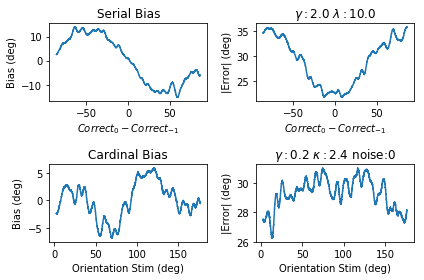

38.0009384188075
Throwing away 22867 trials with zero [0] spikes


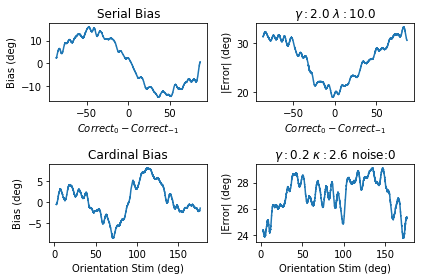

35.75053273936488
Throwing away 20257 trials with zero [0] spikes


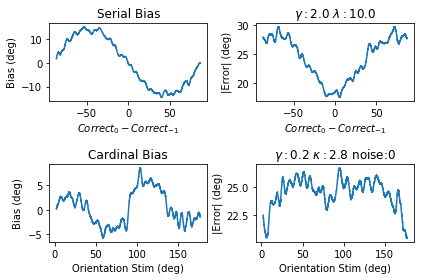

33.44478417870266
Throwing away 17263 trials with zero [0] spikes


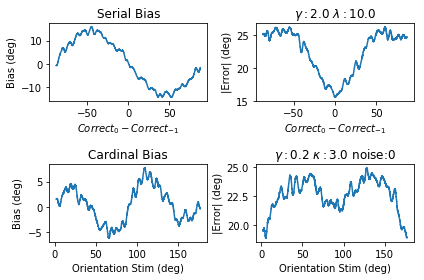

36.41827932067082
Throwing away 18231 trials with zero [0] spikes


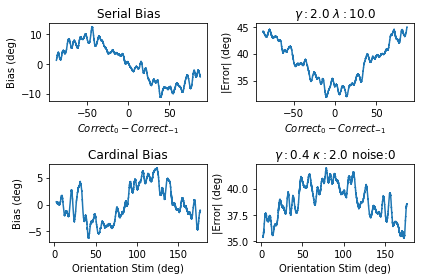

34.27954398660519
Throwing away 15660 trials with zero [0] spikes


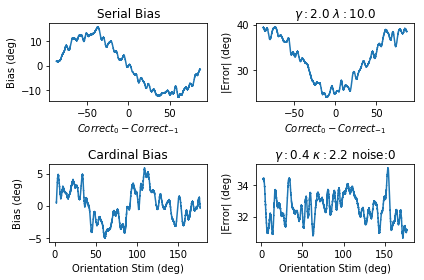

31.672160615278525
Throwing away 13295 trials with zero [0] spikes


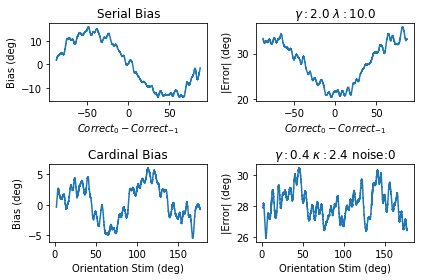

29.06179554070257
Throwing away 10471 trials with zero [0] spikes


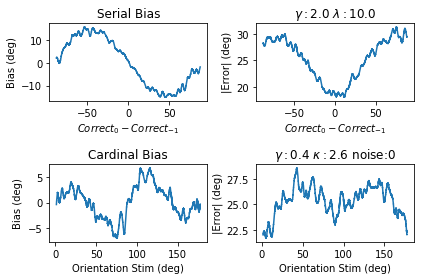

26.336650265172295
Throwing away 7986 trials with zero [0] spikes


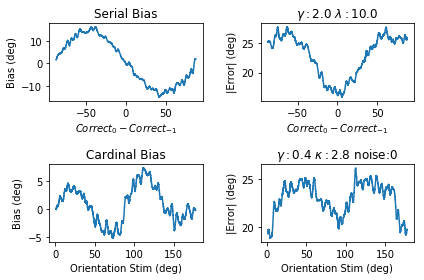

23.992294009535645
Throwing away 6059 trials with zero [0] spikes


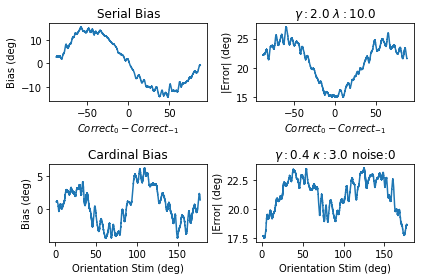

32.11809212385443
Throwing away 11216 trials with zero [0] spikes


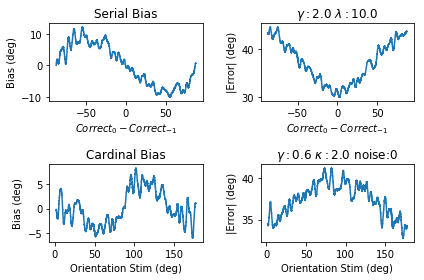

29.46265974554232
Throwing away 8923 trials with zero [0] spikes


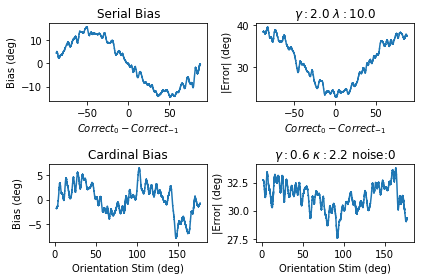

26.707665419381005
Throwing away 6736 trials with zero [0] spikes


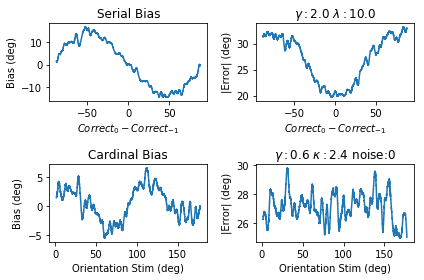

24.218481474436008
Throwing away 5050 trials with zero [0] spikes


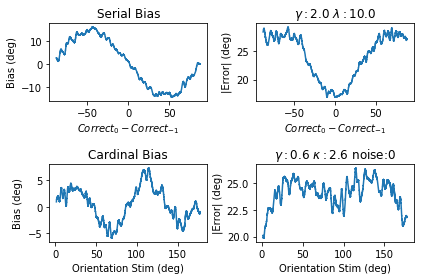

21.68720594517422
Throwing away 3294 trials with zero [0] spikes


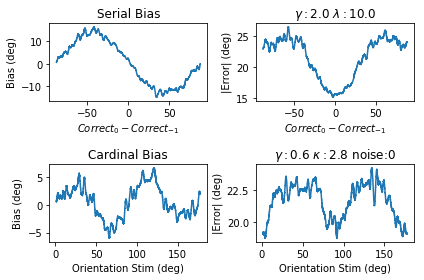

19.529898859328483
Throwing away 2146 trials with zero [0] spikes


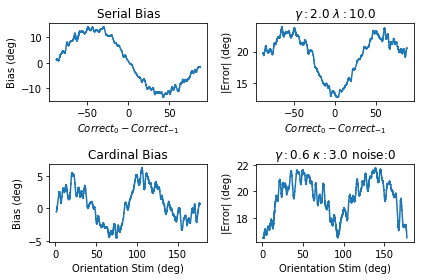

28.76355188909047
Throwing away 6709 trials with zero [0] spikes


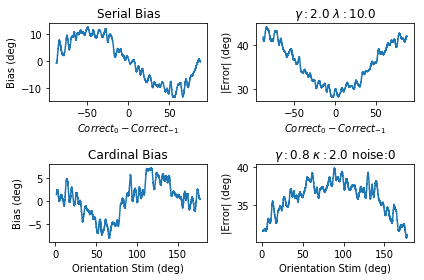

25.98945930364078
Throwing away 4950 trials with zero [0] spikes


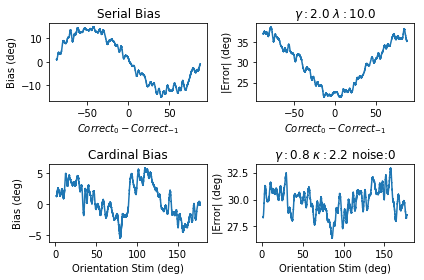

23.489298381952576
Throwing away 3421 trials with zero [0] spikes


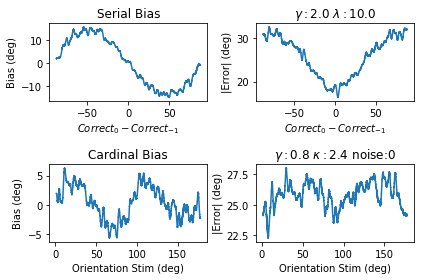

21.28946980080998
Throwing away 2322 trials with zero [0] spikes


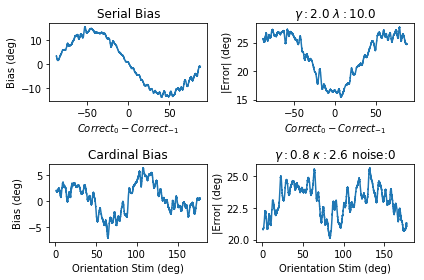

19.082577402059712
Throwing away 1310 trials with zero [0] spikes


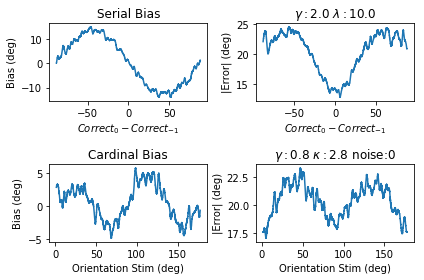

17.045393531849008
Throwing away 702 trials with zero [0] spikes


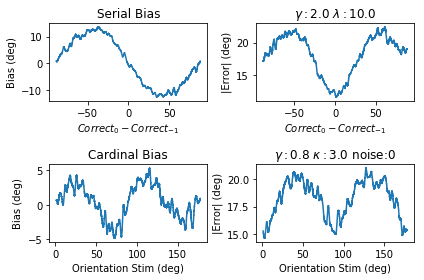

In [5]:
kappaCB = np.arange(2.0,3.1,.2)
gammaCB = np.arange(0.2,0.9,.2)
# kappa 2:4
# gamma .2 -> .8
for gam in gammaCB:
    for kap in kappaCB:
        thisM = MJ.modJoint(kappaCB=kap,gammaCB=gam,noiseCB=0)
        thisM.run_model(50000)
        thisM.quick_view_results(sav_root = '_figs/')


# Next steps
* Increase firing rate and add noise 
* add variable uncertainty for SB (that makes sense)


# Extra Visualizations for Presenting 

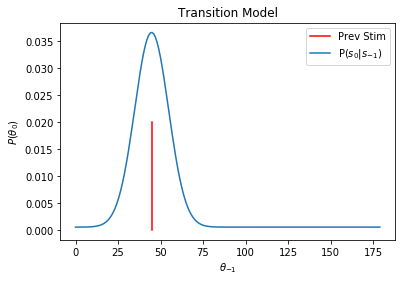

In [266]:
prev_stim = 45
bar = foo.cf(prev_stim)
plt.plot([prev_stim,prev_stim],[0,.02],'r')
plt.plot(bar)
plt.title('Transition Model')
plt.xlabel('$\\theta_{-1}$')
plt.ylabel('$P(\\theta_0)$')
plt.legend(('Prev Stim','P($s_0|s_{-1}$)'))
plt.show()